In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# **PART A**

In [ ]:
ncvs = pd.read_csv('NCVS.csv')
print(ncvs.shape)
np.array(ncvs.columns)

(8043, 81)


array(['YEARQ', 'IDHH', 'ICPSR', 'PANEL_ROT_GROUP', 'URBANICITY',
       'LIV_TYPE', 'UNITS', 'OUTSIDE', 'GATED', 'RESTRICTED', 'INCOME',
       'RACE_HOH', 'PRINCIPAL_REL', 'PRINCIPAL_AGE', 'PRINCIPAL_MARITAL',
       'PRINCIPAL_SEX', 'PRINCIPAL_ARMFOR', 'PRINCIPAL_ED',
       'PRINCIPAL_RACE', 'PRINCIPAL_HISP', 'REF_AGE', 'REF_MARITAL',
       'REF_SEX', 'REF_ARMFOR', 'REF_ED', 'REF_RACE', 'REF_HISP',
       'NUM_OVER12', 'NUM_UNDER12', 'NUM_REPORT', 'BUSINESS',
       'BUSINESS_SIGN', 'BROKEN_IN', 'NUM_BROKEN_IN', 'NUM_VEHICLE',
       'VEHICLE_THEFT', 'NUM_VEHICLE_THEFT', 'COLLEGE', 'PUBLIC',
       'INDIAN_RES', 'FAMILY_STRUCTURE', 'REGION', 'PRINCIPAL_SCHOOL',
       'REF_SCHOOL', 'REF_REL', 'AGE', 'MARITAL', 'SEX', 'ARMFOR', 'ED',
       'RACE', 'HISP', 'STOLEN', 'NUM_STOLEN', 'ATTACK_LOC', 'WEAPON',
       'NUM_WEAPON', 'OFFENDER_KNOWN', 'NUM_OFFENDER_KNOWN', 'FORCED_SEX',
       'NUM_FORCED_SEX', 'POLICE', 'NO_POLICE', 'DIS_HEAR', 'DIS_VIS',
       'DIS_LEARN', 'DIS_PHYS', 'DI

In [ ]:
ncvs.head(100)

,YEARQ,IDHH,ICPSR,PANEL_ROT_GROUP,URBANICITY,LIV_TYPE,UNITS,OUTSIDE,GATED,RESTRICTED,...,ACTIVE_DUTY,JOB_WEEK,JOB_6MO,JOB_2WEEK,JOB,EMP_TYPE,JOB_LOC,JOB_COLLEGE,ATT_COLLEGE,NUM_INCIDENTS
0,2020.1,1.602010e+24,9,37,2,1,6,1,2,2,...,1,1,9,9,11,3,1,2,4,1
1,2020.1,1.602070e+24,9,31,1,12,6,2,2,2,...,1,2,1,1,23,1,3,2,1,2
2,2020.1,1.602070e+24,9,31,1,12,6,2,2,2,...,1,2,1,1,23,1,3,2,1,2
3,2020.1,1.602070e+24,5,21,2,1,1,9,2,2,...,1,1,9,9,12,3,1,1,4,1
4,2020.1,1.602070e+24,5,37,2,1,1,9,2,2,...,4,1,9,9,26,1,4,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2020.1,1.605830e+24,23,17,1,12,8,1,2,1,...,1,1,9,9,27,1,4,2,4,4
96,2020.1,1.605830e+24,23,17,1,12,8,1,2,1,...,1,1,9,9,27,1,4,2,4,4
97,2020.1,1.605830e+24,23,17,1,12,8,1,2,1,...,1,1,9,9,27,1,4,2,4,4
98,2020.1,1.605830e+24,23,17,1,12,8,1,2,1,...,1,1,9,9,27,1,4,2,4,4


In [ ]:
# UNIQUE HOUSEHOLDS
print('The number of unique households at a given interview:',len(ncvs['IDHH'].unique()))

print('The number of unique household records in a collection quarter:',len(ncvs['ICPSR'].unique()))


The number of unique households at a given interview: 1811
The number of unique household records in a collection quarter: 83


In [ ]:
ncvs['SEX'] = ncvs['SEX'].map({1:'MALE', 2:'FEMALE'})
ncvs['MARITAL'] = ncvs['MARITAL'].map({1:'Married', 2:'Widowed', 3:'Divorced',4:'Separated', 5:'Never_Married', 8:'Residue'})
ncvs['FORCED_SEX'] = ncvs['FORCED_SEX'].map({1:'Yes', 2:'No', 3:'Refused'})
ncvs['OFFENDER_KNOWN'] = ncvs['OFFENDER_KNOWN'].map({1:'Yes', 2:'No', 3:'Refused'})
ncvs['VEHICLE_THEFT'] = ncvs['VEHICLE_THEFT'].map({1:'Yes', 2:'No'})


income = {1:'0 - 5000', 2:'5000 - 7499', 3:'7500 - 9999',
4: '10000 - 12499', 5: '12500 - 14999', 6: '15000 - 17499', 7: '17500 - 19999',
8:'20000 - 24999', 9: '25000 - 29999' ,10: '30000 - 34999',11: '35000 - 39999',
12: '40000 - 49999',13: '50000 - 74999',15: '75000 - 99999',16: '100000-149999',
17: '150000-199999',18: '200000 or more'}

ed_lab = { 0: "Nev/kindergarten",1: "Elementary",2: "Elementary",
3: "Elementary",4: "Elementary",5: "Elementary",6: "Elementary",
7: "Elementary",8: "Elementary",9: "High school",10: "High school",
11: "High school",12: "High school",21: "College",22: "College",
23: "College",24: "College",25: "College",26: "College",
27: "12th grade (no diploma)",28: "High school grad (Diploma or equivalent)",
40: "Some college (no degree)",41: "Associate degree",42: "Bachelor degree",
43: "Master degree",44: "Prof school degree",45: "Doctorate degree",
98: "Residue",99: "Out of universe"}

liv_type = {1: 'House, apartment, flat', 2: 'Housing unit in nontransient hotel, motel, etc.',
3: 'Housing unit permanent in transient hotel, motel, etc.',
4: 'Housing unit in rooming house',5: 'Mobile home or trailer with no permanent room added',
6: 'Mobile home or trailer with one or more permanent rooms added',
7: 'Housing unit not specified above',8: 'Quarters not housing unit in rooming or boarding house',
9: 'Unit not permanent in transient hotel, motel, etc.',10: 'Unoccupied site for mobile home, trailer, or tent',
11: 'Student quarters in college dormitory',12: 'Other unit not specified above',
98: 'Residue',99: 'Out of universe'
}

ncvs['ED'] = ncvs.ED.replace(ed_lab)
ncvs['INCOME'] = ncvs.INCOME.replace(income)
ncvs['LIV_TYPE'] = ncvs.LIV_TYPE.replace(liv_type)

ncvs

,YEARQ,IDHH,ICPSR,PANEL_ROT_GROUP,URBANICITY,LIV_TYPE,UNITS,OUTSIDE,GATED,RESTRICTED,...,ACTIVE_DUTY,JOB_WEEK,JOB_6MO,JOB_2WEEK,JOB,EMP_TYPE,JOB_LOC,JOB_COLLEGE,ATT_COLLEGE,NUM_INCIDENTS
0,2020.1,1.602010e+24,9,37,2,"House, apartment, flat",6,1,2,2,...,1,1,9,9,11,3,1,2,4,1
1,2020.1,1.602070e+24,9,31,1,Other unit not specified above,6,2,2,2,...,1,2,1,1,23,1,3,2,1,2
2,2020.1,1.602070e+24,9,31,1,Other unit not specified above,6,2,2,2,...,1,2,1,1,23,1,3,2,1,2
3,2020.1,1.602070e+24,5,21,2,"House, apartment, flat",1,9,2,2,...,1,1,9,9,12,3,1,1,4,1
4,2020.1,1.602070e+24,5,37,2,"House, apartment, flat",1,9,2,2,...,4,1,9,9,26,1,4,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8038,2020.4,1.998940e+24,3,47,3,Mobile home or trailer with no permanent room ...,1,9,2,2,...,1,1,9,9,23,1,3,2,4,3
8039,2020.4,1.998940e+24,2,47,2,"House, apartment, flat",1,9,2,2,...,1,2,2,9,99,9,9,9,1,2
8040,2020.4,1.998940e+24,2,47,2,"House, apartment, flat",1,9,2,2,...,1,2,2,9,99,9,9,9,1,2
8041,2020.4,1.998950e+24,7,57,1,"House, apartment, flat",1,9,2,2,...,1,1,9,9,4,3,1,1,4,1


# **PART B**


The average age is: 45.25


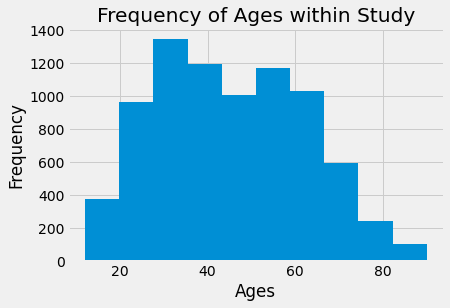

In [ ]:
plt.hist(ncvs.AGE)
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.title('Frequency of Ages within Study')

print('The average age is:', round(np.mean(ncvs.AGE),2))

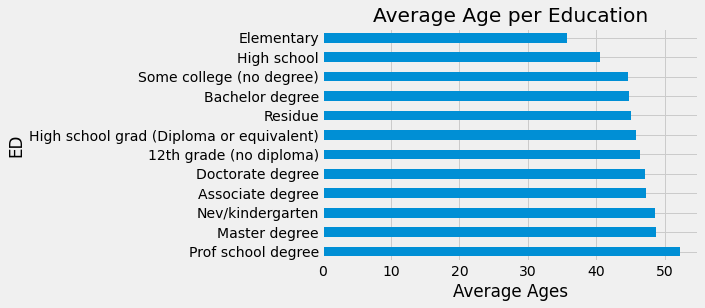

In [ ]:
age_ed = ncvs.groupby(['ED']).mean()['AGE'].sort_values(ascending=False)
age_ed.plot.barh()

plt.xlabel('Average Ages')
plt.ylabel('ED')
plt.title('Average Age per Education')
plt.show()

In [ ]:
age_ed

ED
Prof school degree                          52.293233
Master degree                               48.713217
Nev/kindergarten                            48.555556
Associate degree                            47.202008
Doctorate degree                            47.117647
12th grade (no diploma)                     46.380567
High school grad (Diploma or equivalent)    45.813817
Residue                                     45.042553
Bachelor degree                             44.712815
Some college (no degree)                    44.670909
High school                                 40.563877
Elementary                                  35.728814
Name: AGE, dtype: float64

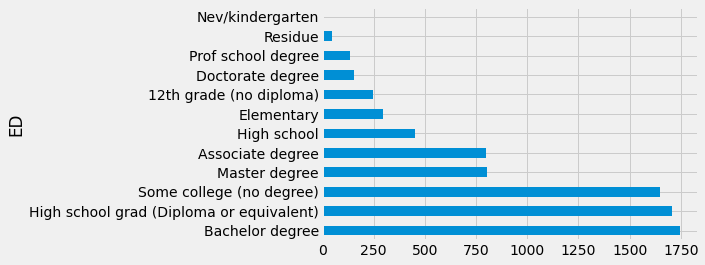

In [ ]:
ed_vehicle = ncvs.groupby(['ED']).count()['NUM_VEHICLE'].sort_values(ascending=False)
ed_vehicle.plot.barh()

This shows that an increase in education levels would show an increase in the amount of vehicles a person would purchase.

In [ ]:
in_cardf = ncvs.groupby(['INCOME']).count()['NUM_VEHICLE']
in_cardf

INCOME
0 - 5000           228
10000 - 12499      270
100000-149999      998
12500 - 14999      192
15000 - 17499      181
150000-199999      436
17500 - 19999      182
20000 - 24999      470
200000 or more     527
25000 - 29999      358
30000 - 34999      443
35000 - 39999      427
40000 - 49999      717
5000 - 7499        109
50000 - 74999     1349
7500 - 9999        170
75000 - 99999      986
Name: NUM_VEHICLE, dtype: int64

In [ ]:
in_cardf.idxmax()

'50000 - 74999'

        NUM_VEHICLE
SEX                
FEMALE         4338
MALE           3705 AxesSubplot(0.08,0.07;0.87x0.81)


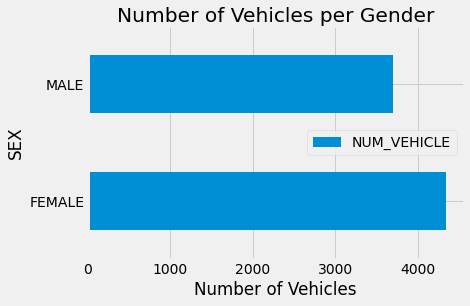

In [ ]:
# NUMBER OF VEHICLES PER GENDER
se_indf = pd.DataFrame(ncvs.groupby(['SEX']).count()['NUM_VEHICLE'])
print(se_indf, se_indf.plot.barh())
plt.xlabel('Number of Vehicles')
plt.title('Number of Vehicles per Gender', pad = 0.9)
plt.show()


We also see that women own or had at one point owned a vehicle more often then men.

In [ ]:
# Average age for marital status
age_mardf = pd.DataFrame(ncvs.groupby(['MARITAL']).mean()['AGE']).drop('Residue')
age_mardf.rename(columns = {'AGE': 'Average Age'})

,Average Age
MARITAL,
Divorced,53.591898
Married,48.662408
Never_Married,33.246739
Separated,45.654485
Widowed,68.292632


In [ ]:
age_mardf = pd.DataFrame(ncvs.groupby(['MARITAL','SEX']).mean()['AGE']).drop('Residue')
age_mardf.rename(columns = {'AGE': 'Average Age'})

Average Age
MARITAL       SEX                
Divorced      FEMALE    52.773767
              MALE      54.946215
Married       FEMALE    47.538317
              MALE      49.825211
Never_Married FEMALE    32.897113
              MALE      33.581973
Separated     FEMALE    44.579487
              MALE      47.632075
Widowed       FEMALE    68.701705
              MALE      67.121951

In [ ]:
age_mardf.rename(columns = {'AGE': 'Average Age'})

Average Age
MARITAL       SEX                
Divorced      FEMALE    52.773767
              MALE      54.946215
Married       FEMALE    47.538317
              MALE      49.825211
Never_Married FEMALE    32.897113
              MALE      33.581973
Separated     FEMALE    44.579487
              MALE      47.632075
Widowed       FEMALE    68.701705
              MALE      67.121951

In [ ]:
age_geddf = pd.DataFrame(ncvs.groupby(['ED','SEX']).mean()['AGE'])
age_geddf

AGE
ED                                       SEX              
12th grade (no diploma)                  FEMALE  47.428571
                                         MALE    45.009346
Associate degree                         FEMALE  47.092742
                                         MALE    47.382060
Bachelor degree                          FEMALE  44.596340
                                         MALE    44.844933
Doctorate degree                         FEMALE  45.283784
                                         MALE    48.835443
Elementary                               FEMALE  35.738255
                                         MALE    35.719178
High school                              FEMALE  43.211765
                                         MALE    37.170854
High school grad (Diploma or equivalent) FEMALE  46.572104
                                         MALE    45.069606
Master degree                            FEMALE  48.599138
                                         MALE    48.869822
Nev/kindergarten                         FEMALE  49.666667
                                         MALE    46.333333
Prof school degree                       FEMALE  49.112903
                                         MALE    55.070423
Residue                                  FEMALE  44.538462
                                         MALE    45.235294
Some college (no degree)                 FEMALE  45.043142
                                         MALE    44.219839

# **PART C**


In [ ]:
# 1) new data frame with columns: marital status, forced sex, stolen, offender known, age, education, income, sex
sncvs_df = pd.DataFrame().assign(Age=ncvs['AGE'], Marital_Status=ncvs['MARITAL'],
GENDER = ncvs['SEX'], INCOME = ncvs['INCOME'], SEXUAL_ASSAULT = ncvs['FORCED_SEX'],
OFFENDER_KNOWN = ncvs['OFFENDER_KNOWN'])

sncvs_df

,Age,Marital_Status,GENDER,INCOME,SEXUAL_ASSAULT,OFFENDER_KNOWN
0,62,Divorced,FEMALE,100000-149999,No,No
1,20,Never_Married,MALE,5000 - 7499,No,No
2,20,Never_Married,MALE,5000 - 7499,No,No
3,63,Never_Married,FEMALE,25000 - 29999,No,No
4,58,Married,MALE,100000-149999,No,No
...,...,...,...,...,...,...
8038,22,Never_Married,FEMALE,7500 - 9999,No,No
8039,22,Widowed,FEMALE,40000 - 49999,No,No
8040,22,Widowed,FEMALE,40000 - 49999,No,No
8041,31,Married,MALE,200000 or more,No,No


In [ ]:
# Shows whether or not an offender is known only if sexual assault has occurred
sncvs_df = sncvs_df.loc[~((sncvs_df['OFFENDER_KNOWN'] == 'Yes') & (sncvs_df['SEXUAL_ASSAULT'] =='No'))]
sncvs_df

,Age,Marital_Status,GENDER,INCOME,SEXUAL_ASSAULT,OFFENDER_KNOWN
0,62,Divorced,FEMALE,100000-149999,No,No
1,20,Never_Married,MALE,5000 - 7499,No,No
2,20,Never_Married,MALE,5000 - 7499,No,No
3,63,Never_Married,FEMALE,25000 - 29999,No,No
4,58,Married,MALE,100000-149999,No,No
...,...,...,...,...,...,...
8038,22,Never_Married,FEMALE,7500 - 9999,No,No
8039,22,Widowed,FEMALE,40000 - 49999,No,No
8040,22,Widowed,FEMALE,40000 - 49999,No,No
8041,31,Married,MALE,200000 or more,No,No


In [ ]:
def count_SA(series):
    'Count the amount of sexual assaults that occurred per marital status.'
    return (series == 'Yes').sum()

ms_sadf = sncvs_df.groupby(['Marital_Status'])['SEXUAL_ASSAULT'].apply(count_SA).sort_values(ascending=False).reset_index(name='Number of Sexual Assaults')
ms_sadf

,Marital_Status,Number of Sexual Assaults
0,Never_Married,51
1,Divorced,23
2,Widowed,12
3,Separated,8
4,Married,5
5,Residue,0


In [ ]:
ms_sadf2 = ms_sadf.drop(ms_sadf.index[5])
ms_sadf2

,Marital_Status,Number of Sexual Assaults
0,Never_Married,51
1,Divorced,23
2,Widowed,12
3,Separated,8
4,Married,5


Text(0.5, 1.0, 'Sexual Assaults per Marital Status')

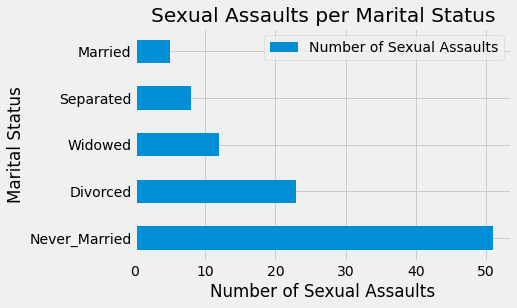

In [ ]:
ms_sadf2.plot.barh(x = 'Marital_Status')
plt.xlabel('Number of Sexual Assaults')
plt.ylabel('Marital Status')
plt.title('Sexual Assaults per Marital Status')

In [ ]:
msg_sadf = pd.pivot_table(sncvs_df, values = 'SEXUAL_ASSAULT',index = ['Marital_Status','GENDER'], aggfunc = count_SA)
msg_sadf

SEXUAL_ASSAULT
Marital_Status GENDER                
Divorced       FEMALE              19
               MALE                 4
Married        FEMALE               2
               MALE                 3
Never_Married  FEMALE              49
               MALE                 2
Residue        FEMALE               0
               MALE                 0
Separated      FEMALE               8
               MALE                 0
Widowed        FEMALE              11
               MALE                 1

In [ ]:
msg_sadf2 = msg_sadf.drop('Residue')
msg_sadf2

SEXUAL_ASSAULT
Marital_Status GENDER                
Divorced       FEMALE              19
               MALE                 4
Married        FEMALE               2
               MALE                 3
Never_Married  FEMALE              49
               MALE                 2
Separated      FEMALE               8
               MALE                 0
Widowed        FEMALE              11
               MALE                 1

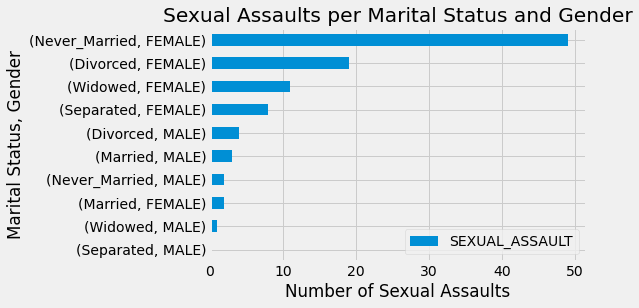

In [ ]:
msg_sadf2.sort_values(by='SEXUAL_ASSAULT').plot.barh()
plt.xlabel('Number of Sexual Assaults')
plt.ylabel('Marital Status, Gender')
plt.title('Sexual Assaults per Marital Status and Gender')
plt.show()

                       OFFENDER_KNOWN  SEXUAL_ASSAULT
Marital_Status GENDER                                
Divorced       FEMALE               3              19
               MALE                 0               4
Married        FEMALE               0               2
               MALE                 0               3
Never_Married  FEMALE               8              49
               MALE                 1               2
Residue        FEMALE               0               0
               MALE                 0               0
Separated      FEMALE               0               8
               MALE                 0               0
Widowed        FEMALE               0              11
               MALE                 0               1 AxesSubplot(0.08,0.07;0.87x0.81)


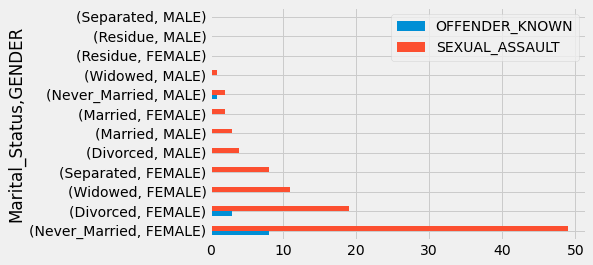

In [ ]:
msf_sadf = pd.pivot_table(sncvs_df, values = ['SEXUAL_ASSAULT', 'OFFENDER_KNOWN'],index = ['Marital_Status','GENDER'], aggfunc = count_SA)
print(msf_sadf,msf_sadf.sort_values(by=['SEXUAL_ASSAULT'],ascending=False).plot.barh())

In [ ]:
def avg_age(df):
    '''Calculate the average age per marital status and assigns the
    result to a new column in the dataframe. '''
    group = df.groupby(['GENDER', 'Marital_Status'])['Age'].mean()
    re_group = group.to_frame().reset_index()
    re_group = re_group.rename(columns={'Age': 'Average_Age'})
    df = pd.merge(df, re_group, on=['GENDER', 'Marital_Status'], how='left')
    return df


new_df = avg_age(sncvs_df)
nodup_df = new_df.drop_duplicates()
nodup_df

,Age,Marital_Status,GENDER,INCOME,SEXUAL_ASSAULT,OFFENDER_KNOWN,Average_Age
0,62,Divorced,FEMALE,100000-149999,No,No,52.790091
1,20,Never_Married,MALE,5000 - 7499,No,No,33.707715
3,63,Never_Married,FEMALE,25000 - 29999,No,No,32.839243
4,58,Married,MALE,100000-149999,No,No,49.763685
5,48,Separated,MALE,200000 or more,No,No,49.041667
...,...,...,...,...,...,...,...
7605,44,Never_Married,FEMALE,50000 - 74999,No,No,32.839243
7609,71,Married,FEMALE,200000 or more,No,No,47.827793
7613,60,Residue,MALE,50000 - 74999,No,No,51.960000
7614,66,Divorced,MALE,20000 - 24999,No,No,54.854209


**PART C: VARIABLE 1**

In the first half, we see that never married women experience the most sexual assault. We also see that they experience the assault the most from people they known.

**VARIABLES IN THIS HALF**
- Household: Marital Status and gender
- Crime: Sexual Assault

In [ ]:
encvs_df = pd.DataFrame().assign(Age=ncvs['AGE'], EDUCATION=ncvs['ED'],
GENDER = ncvs['SEX'], INCOME = ncvs['INCOME'],
LIVING_TYPE = ncvs['LIV_TYPE'], NUM_VEHICLE = ncvs['NUM_VEHICLE'],
VEHICLE_THEFT = ncvs['VEHICLE_THEFT'], FREQUENCY_VEHICLE_THEFT = ncvs['NUM_VEHICLE_THEFT'],
OFFENDER_KNOWN = ncvs['OFFENDER_KNOWN'])

encvs_df.dropna()

,Age,EDUCATION,GENDER,INCOME,LIVING_TYPE,NUM_VEHICLE,VEHICLE_THEFT,FREQUENCY_VEHICLE_THEFT,OFFENDER_KNOWN
0,62,Bachelor degree,FEMALE,100000-149999,"House, apartment, flat",1,Yes,1,No
1,20,Associate degree,MALE,5000 - 7499,Other unit not specified above,2,No,999,No
2,20,Associate degree,MALE,5000 - 7499,Other unit not specified above,2,No,999,No
3,63,Bachelor degree,FEMALE,25000 - 29999,"House, apartment, flat",1,No,999,No
4,58,High school grad (Diploma or equivalent),MALE,100000-149999,"House, apartment, flat",3,No,999,No
...,...,...,...,...,...,...,...,...,...
8035,67,Some college (no degree),MALE,25000 - 29999,"House, apartment, flat",4,No,999,No
8039,22,Some college (no degree),FEMALE,40000 - 49999,"House, apartment, flat",2,No,999,No
8040,22,Some college (no degree),FEMALE,40000 - 49999,"House, apartment, flat",2,No,999,No
8041,31,Doctorate degree,MALE,200000 or more,"House, apartment, flat",2,No,999,No


In [ ]:
# Removed values of offender known but vehicle theft did not occur
encvs_df = encvs_df.loc[~((encvs_df['OFFENDER_KNOWN'] == 'Yes') & (encvs_df['VEHICLE_THEFT'] =='No'))]
encvs_df.drop(encvs_df[encvs_df.FREQUENCY_VEHICLE_THEFT >= 8].index, inplace=True)
encvs_df

,Age,EDUCATION,GENDER,INCOME,LIVING_TYPE,NUM_VEHICLE,VEHICLE_THEFT,FREQUENCY_VEHICLE_THEFT,OFFENDER_KNOWN
0,62,Bachelor degree,FEMALE,100000-149999,"House, apartment, flat",1,Yes,1,No
21,39,Bachelor degree,FEMALE,50000 - 74999,"House, apartment, flat",4,Yes,1,No
31,47,High school,FEMALE,20000 - 24999,"House, apartment, flat",1,Yes,1,No
37,49,Some college (no degree),FEMALE,75000 - 99999,"House, apartment, flat",3,Yes,1,No
38,49,Some college (no degree),FEMALE,75000 - 99999,"House, apartment, flat",3,Yes,1,No
...,...,...,...,...,...,...,...,...,...
8008,43,Associate degree,MALE,100000-149999,"House, apartment, flat",4,Yes,1,No
8010,58,Some college (no degree),MALE,200000 or more,"House, apartment, flat",4,Yes,1,No
8011,23,Associate degree,FEMALE,200000 or more,"House, apartment, flat",4,Yes,1,No
8021,66,High school grad (Diploma or equivalent),MALE,20000 - 24999,"House, apartment, flat",1,Yes,1,No


In [ ]:
def count_vt(series):
    'Count the amount of vehicle thefts that occurred per education level'
    return (series == 'Yes').sum()

ed_vtdf = encvs_df.groupby(['EDUCATION'])['VEHICLE_THEFT'].apply(count_vt).reset_index(name='Number of Vehical Thefts')
ed_vtdf

,EDUCATION,Number of Vehical Thefts
0,12th grade (no diploma),41
1,Associate degree,112
2,Bachelor degree,241
3,Doctorate degree,9
4,Elementary,19
5,High school,74
6,High school grad (Diploma or equivalent),257
7,Master degree,105
8,Nev/kindergarten,1
9,Prof school degree,19


We see that the more education received influences the number of vehical thefts per degree.

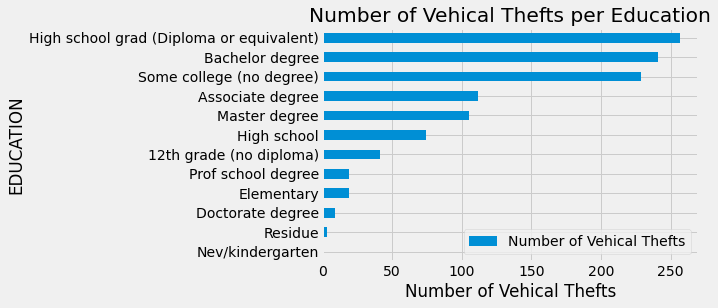

In [ ]:
ed_vtdf.sort_values(by=['Number of Vehical Thefts']).plot.barh(x = 'EDUCATION')
plt.xlabel('Number of Vehical Thefts')
plt.ylabel('EDUCATION')
plt.title('Number of Vehical Thefts per Education')
plt.legend(loc='lower right')
plt.show()

In [ ]:
ed_gdf = pd.pivot_table(encvs_df, values = 'VEHICLE_THEFT',index = ['EDUCATION','GENDER'], aggfunc = count_vt)
ed_gdf

VEHICLE_THEFT
EDUCATION                                GENDER               
12th grade (no diploma)                  FEMALE             18
                                         MALE               23
Associate degree                         FEMALE             77
                                         MALE               35
Bachelor degree                          FEMALE            139
                                         MALE              102
Doctorate degree                         FEMALE              2
                                         MALE                7
Elementary                               FEMALE              5
                                         MALE               14
High school                              FEMALE             53
                                         MALE               21
High school grad (Diploma or equivalent) FEMALE            123
                                         MALE              134
Master degree                            FEMALE             55
                                         MALE               50
Nev/kindergarten                         FEMALE              1
Prof school degree                       FEMALE              9
                                         MALE               10
Residue                                  FEMALE              3
Some college (no degree)                 FEMALE            132
                                         MALE               97

In [ ]:
ed_ltdf = pd.pivot_table(encvs_df, values = 'VEHICLE_THEFT',index = ['EDUCATION','LIVING_TYPE'], aggfunc = count_vt)
ed_ltdf

VEHICLE_THEFT
EDUCATION                                LIVING_TYPE                                                      
12th grade (no diploma)                  House, apartment, flat                                         41
Associate degree                         House, apartment, flat                                        108
                                         Housing unit not specified above                                2
                                         Other unit not specified above                                  2
Bachelor degree                          House, apartment, flat                                        239
                                         Mobile home or trailer with no permanent room a...              2
Doctorate degree                         House, apartment, flat                                          9
Elementary                               House, apartment, flat                                         18
                                         Mobile home or trailer with no permanent room a...              1
High school                              House, apartment, flat                                         58
                                         Mobile home or trailer with no permanent room a...              6
                                         Mobile home or trailer with one or more permane...             10
High school grad (Diploma or equivalent) House, apartment, flat                                        240
                                         Mobile home or trailer with no permanent room a...             14
                                         Mobile home or trailer with one or more permane...              2
                                         Other unit not specified above                                  1
Master degree                            House, apartment, flat                                        105
Nev/kindergarten                         Mobile home or trailer with no permanent room a...              1
Prof school degree                       House, apartment, flat                                         19
Residue                                  House, apartment, flat                                          3
Some college (no degree)                 House, apartment, flat                                        212
                                         Mobile home or trailer with no permanent room a...             17

In [ ]:
ed_ltddf = pd.pivot_table(encvs_df, values = 'VEHICLE_THEFT',index = ['EDUCATION','LIVING_TYPE','GENDER'], aggfunc = count_vt)
ed_ltddf

VEHICLE_THEFT
EDUCATION                                LIVING_TYPE                                        GENDER               
12th grade (no diploma)                  House, apartment, flat                             FEMALE             18
                                                                                            MALE               23
Associate degree                         House, apartment, flat                             FEMALE             75
                                                                                            MALE               33
                                         Housing unit not specified above                   FEMALE              2
                                         Other unit not specified above                     MALE                2
Bachelor degree                          House, apartment, flat                             FEMALE            138
                                                                                            MALE              101
                                         Mobile home or trailer with no permanent room a... FEMALE              1
                                                                                            MALE                1
Doctorate degree                         House, apartment, flat                             FEMALE              2
                                                                                            MALE                7
Elementary                               House, apartment, flat                             FEMALE              5
                                                                                            MALE               13
                                         Mobile home or trailer with no permanent room a... MALE                1
High school                              House, apartment, flat                             FEMALE             37
                                                                                            MALE               21
                                         Mobile home or trailer with no permanent room a... FEMALE              6
                                         Mobile home or trailer with one or more permane... FEMALE             10
High school grad (Diploma or equivalent) House, apartment, flat                             FEMALE            111
                                                                                            MALE              129
                                         Mobile home or trailer with no permanent room a... FEMALE             12
                                                                                            MALE                2
                                         Mobile home or trailer with one or more permane... MALE                2
                                         Other unit not specified above                     MALE                1
Master degree                            House, apartment, flat                             FEMALE             55
                                                                                            MALE               50
Nev/kindergarten                         Mobile home or trailer with no permanent room a... FEMALE              1
Prof school degree                       House, apartment, flat                             FEMALE              9
                                                                                            MALE               10
Residue                                  House, apartment, flat                             FEMALE              3
Some college (no degree)                 House, apartment, flat                             FEMALE            121
                                                                                            MALE               91
                                         Mobile home or trailer with no permanent room a... FEMALE            

In [ ]:
ed_ltddf.sort_values(by=['VEHICLE_THEFT'], ascending=False).head(5)

,,,VEHICLE_THEFT
EDUCATION,LIVING_TYPE,GENDER,
Bachelor degree,"House, apartment, flat",FEMALE,138
High school grad (Diploma or equivalent),"House, apartment, flat",MALE,129
Some college (no degree),"House, apartment, flat",FEMALE,121
High school grad (Diploma or equivalent),"House, apartment, flat",FEMALE,111
Bachelor degree,"House, apartment, flat",MALE,101


                                                 VEHICLE_THEFT
EDUCATION                                GENDER               
12th grade (no diploma)                  FEMALE             18
                                         MALE               23
Associate degree                         FEMALE             77
                                         MALE               35
Bachelor degree                          FEMALE            139
                                         MALE              102
Doctorate degree                         FEMALE              2
                                         MALE                7
Elementary                               FEMALE              5
                                         MALE               14
High school                              FEMALE             53
                                         MALE               21
High school grad (Diploma or equivalent) FEMALE            123
                                         MALE          

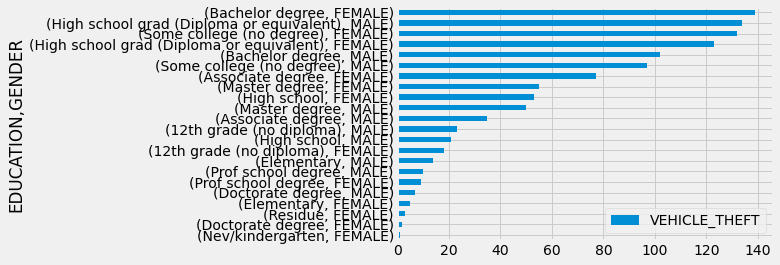

In [ ]:
edf_vtdf = pd.pivot_table(encvs_df, values = ['VEHICLE_THEFT'],index = ['EDUCATION','GENDER'], aggfunc = count_vt)
print(edf_vtdf.drop('Residue'),edf_vtdf.sort_values(by=['VEHICLE_THEFT']).plot.barh())

In [ ]:
edf_vtdf = pd.pivot_table(encvs_df, values = ['VEHICLE_THEFT', 'OFFENDER_KNOWN'],index = ['EDUCATION','LIVING_TYPE','GENDER'], aggfunc = count_vt)
edf_vtdf.sort_values(by='VEHICLE_THEFT', ascending=False)

OFFENDER_KNOWN  \
EDUCATION                                LIVING_TYPE                                        GENDER                   
Bachelor degree                          House, apartment, flat                             FEMALE               5   
High school grad (Diploma or equivalent) House, apartment, flat                             MALE                 2   
Some college (no degree)                 House, apartment, flat                             FEMALE              11   
High school grad (Diploma or equivalent) House, apartment, flat                             FEMALE               0   
Bachelor degree                          House, apartment, flat                             MALE                 2   
Some college (no degree)                 House, apartment, flat                             MALE                 4   
Associate degree                         House, apartment, flat                             FEMALE               8   
Master degree                            House, apartment, flat                             FEMALE               3   
                                                                                            MALE                 0   
High school                              House, apartment, flat                             FEMALE               0   
Associate degree                         House, apartment, flat                             MALE                 1   
12th grade (no diploma)                  House, apartment, flat                             MALE                 5   
High school                              House, apartment, flat                             MALE                 0   
12th grade (no diploma)                  House, apartment, flat                             FEMALE               0   
Elementary                               House, apartment, flat                             MALE                 0   
High school grad (Diploma or equivalent) Mobile home or trailer with no permanent room a... FEMALE               0   
Some college (no degree)                 Mobile home or trailer with no permanent room a... FEMALE               0   
Prof school degree                       House, apartment, flat                             MALE                 0   
High school                              Mobile home or trailer with one or more permane... FEMALE               0   
Prof school degree                       House, apartment, flat                             FEMALE               0   
Doctorate degree                         House, apartment, flat                             MALE                 0   
High school                              Mobile home or trailer with no permanent room a... FEMALE               0   
Some college (no degree)                 Mobile home or trailer with no permanent room a... MALE                 0   
Elementary                               House, apartment, flat                             FEMALE               0   
Residue                                  House, apartment, flat                             FEMALE               0   
High school grad (Diploma or equivalent) Mobile home or trailer with no permanent room a... MALE                 0   
                                         Mobile home or trailer with one or more permane... MALE                 0   
Doctorate degree                         House, apartment, flat                             FEMALE               0   
Associate degree                         Other unit not specified above                     MALE                 0   
                                         Housing unit not specified above                   FEMALE               0   
High school grad (Diploma or equivalent) Other unit not specified above                     MALE                 0   
Elementary                               Mobile home or trailer with no permanent room a... MALE                 0   
Nev/kindergarten                         Mobile home or trailer with no permanent room a

In [ ]:
print('The victim that experiences the most vehicle theft:', ed_ltddf['VEHICLE_THEFT'].idxmax())

print('The victim that knows their offender the most:', edf_vtdf['OFFENDER_KNOWN'].idxmax())

The victim that experiences the most vehicle theft: ('Bachelor degree', 'House, apartment, flat', 'FEMALE')
The victim that knows their offender the most: ('Some college (no degree)', 'House, apartment, flat', 'FEMALE')


**PART C: VARIABLE 2**

The data shows that women who have bachelor degrees who live within a house, apartment, or a flat are more often one victims of vehicle theft, and that women with some college but no degree are more likely to know the offender of such theft.


**VARIABLES HERE**
- Household: Education and Living Type
- Crime: Vehicle theft

In [ ]:
allncvs_df = pd.DataFrame().assign(EDUCATION=ncvs['ED'], GENDER = ncvs['SEX'],
INCOME = ncvs['INCOME'], LIVING_TYPE = ncvs['LIV_TYPE'],
VEHICLE_THEFT = ncvs['VEHICLE_THEFT'], SEXUAL_ASSAULT = ncvs['FORCED_SEX'],
OFFENDER_KNOWN = ncvs['OFFENDER_KNOWN'], NUM_CRIME_REPORT = ncvs['NUM_REPORT'])

def count_ncr(series):
    'Count the amount of crime reports that occurred per income.'
    return (series).sum()

allncvs_df.dropna()

,EDUCATION,GENDER,INCOME,LIVING_TYPE,VEHICLE_THEFT,SEXUAL_ASSAULT,OFFENDER_KNOWN,NUM_CRIME_REPORT
0,Bachelor degree,FEMALE,100000-149999,"House, apartment, flat",Yes,No,No,1
1,Associate degree,MALE,5000 - 7499,Other unit not specified above,No,No,No,2
2,Associate degree,MALE,5000 - 7499,Other unit not specified above,No,No,No,2
3,Bachelor degree,FEMALE,25000 - 29999,"House, apartment, flat",No,No,No,1
4,High school grad (Diploma or equivalent),MALE,100000-149999,"House, apartment, flat",No,No,No,1
...,...,...,...,...,...,...,...,...
8035,Some college (no degree),MALE,25000 - 29999,"House, apartment, flat",No,No,No,1
8039,Some college (no degree),FEMALE,40000 - 49999,"House, apartment, flat",No,No,No,2
8040,Some college (no degree),FEMALE,40000 - 49999,"House, apartment, flat",No,No,No,2
8041,Doctorate degree,MALE,200000 or more,"House, apartment, flat",No,No,No,1


In [ ]:
aldf = allncvs_df.groupby(['INCOME','GENDER'])['NUM_CRIME_REPORT'].apply(count_ncr).reset_index(name='Number of Crime Reports')
aldf

,INCOME,GENDER,Number of Crime Reports
0,0 - 5000,FEMALE,234
1,0 - 5000,MALE,108
2,10000 - 12499,FEMALE,451
3,10000 - 12499,MALE,267
4,100000-149999,FEMALE,788
5,100000-149999,MALE,768
6,12500 - 14999,FEMALE,227
7,12500 - 14999,MALE,87
8,15000 - 17499,FEMALE,218
9,15000 - 17499,MALE,103


In [ ]:
# Returns income, gender, and the person who files the most crime reports for vehicle theft/and or sexual assault
aldf.iloc[aldf['Number of Crime Reports'].idxmax()]

INCOME                     50000 - 74999
GENDER                            FEMALE
Number of Crime Reports             1176
Name: 28, dtype: object

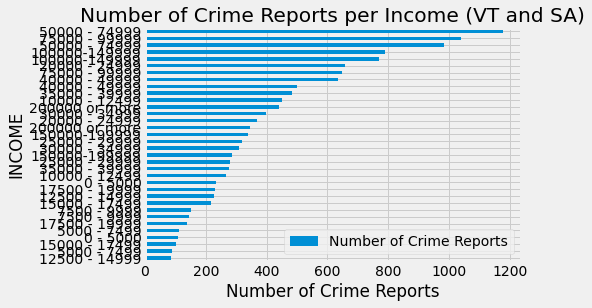

In [ ]:
aldf.sort_values(by=['Number of Crime Reports']).plot.barh(x = 'INCOME')
plt.xlabel('Number of Crime Reports')
plt.ylabel('INCOME')
plt.title('Number of Crime Reports per Income (VT and SA)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
all_inddf = pd.pivot_table(allncvs_df, values = 'NUM_CRIME_REPORT',index = ['EDUCATION','LIVING_TYPE','GENDER','INCOME'], aggfunc = count_ncr)
all_inddf

NUM_CRIME_REPORT
EDUCATION                LIVING_TYPE                           GENDER INCOME                         
12th grade (no diploma)  House, apartment, flat                FEMALE 0 - 5000                     17
                                                                      10000 - 12499                 4
                                                                      100000-149999                11
                                                                      12500 - 14999                 6
                                                                      15000 - 17499                 3
...                                                                                               ...
Some college (no degree) Student quarters in college dormitory FEMALE 0 - 5000                     10
                                                               MALE   0 - 5000                      2
                                                                      10000 - 12499                 1
                                                                      12500 - 14999                 1
                                                                      5000 - 7499                   1

[470 rows x 1 columns]

In [ ]:
 val_most = all_inddf['NUM_CRIME_REPORT'].idxmax()

 print('The victim that files the greatest number of crime reports are people who have a', val_most[0], ', live in a', val_most[1] ,' and make', val_most[3], 'and are', val_most[2].lower(),'.')

The victim that files the greatest number of crime reports are people who have a Bachelor degree , live in a House, apartment, flat  and make 75000 - 99999 and are female .


**PART C: BOTH VARIABLES ***

The income with the highest number of crime reports filled is $50,000 - $74,999, with the income range of $75000 - $99999 being the second highest.

The victim that files the greatest number of crime reports for vehicle theft and/or sexual assault are females who have a Bachelor degree, live in a house, apartment, or flat, and make 75000 - 99999 USD.
